<h1><center>Analysis of Tourist Accommodation in Manhattan, New York</center></h1>

## Table of Contents
1. [Introduction](#intro)   
    1.1 [Background](#back)   
    1.2 [Problem Statement](#probstat)   
2. [Data](#datasrc)   
    2.1 [Data Sources](#dts)   
    2.2 [Solution Approach](#slN)    
3. [References](#ref)


<a id="intro"></a>
## 1. Introduction  
<a id="back"></a>
### 1.1 Background   

New York City, NYC, is the most populated city in the USA and largest metropolitan area in the world. NYC has been described as the cultural, financial, and media capital of the world, and exerts a significant impact upon commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. Many districts and landmarks in New York City are well known, including three of the world's ten most visited tourist attractions in 2013; a record 62.8 million tourists visited in 2017. Several sources have ranked New York the most photographed city in the world.

Manhattan is the most densely populated of the five boroughs of New York City and serves as the city's economic and administrative center. Manhattan has been described as the cultural, financial, media, and entertainment capital of the world. Manhattan hosts three of the world's 10 most-visited tourist attractions in 2013: Times Square, Central Park, and Grand Central Terminal. As one of world’s greatest tourists’ destination, tourism is vital to Manhattan's economy, and the landmarks of Manhattan are the focus of New York City's tourists. As of June 2016, Manhattan had nearly 91,500 hotel rooms, a 26% increase from 2010.

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price. Guests have the ability to search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes.

It would help to guide a visitor looking for an accommodation and a AirBnB property owner to set right price if we can characterize or cluster the Manhattan neighborhoods in terms of 
1. AirBnB properties density and prices
2. Places of interests within the neighborhood


<a id="probstat"></a>
### 1.2 Problem Statement   
With this exercise, we shall try to address below problems.   
•	Is there any co-relation between places of interests and AirBnB property values? If yes, can we describe it.   
•	How to choose the most suitable and convenient location as per the purpose of visit?    
•	Can we characterize the Manhattan neighborhoods in terms of the places of interests and AirBnB properties density and prices?    
•	Can we come up with any guidelines for setting the right price for a property while being listed on AirBnB?    


<a id="datasrc"></a>
## 2 Data   
<a id="dts"></a>
### 2.1 Data Sources
__• Manhattan, NY Geo Data__   
This dataset holds longitude and latitude co-ordinates for all the neighborhoods in Manhattan, NY. Most of the data is available in a json file at https://cocl.us/new_york_dataset , though it is missing few neighborhoods which are part of our AirBnB dataset. For the missing ones, I used geocoder api to get the co-ordinates. As we get the data, I have created a csv file, NY_MH_NEIGHBORHOODS.csv , which can be used for subsequent executions. This saves execution time by removing the outgoing network calls for geocoder api, and json file and parsing of json file for required data.

__• Manhattan, NY Four Square Data__   
This dataset holds data related to venues of interests in neighborhoods. These venues can be business or financial centers, exhibitions, recreational places, transit facilities, recreational places, sports, restaurants, fastfoods, gourmet joints, and so on. Again, I created a file, NY_FOURSQUARE_DATA.csv, which holds collected data for subsequent executions. This helps to reduce redundant calls to Four Square API as these calls and processing involved is time consuming and costly. 
I shall use a reference _value_cat.csv_ (https://github.com/K2Prasanna/Coursera_Capstone/blob/master/resources/venue_cat_ny.csv) to map Four Square Venue categories to fewer borader categories.

Features to be used for FourSquare API response for each venue are:   
    Neighboorhood Name   
    Venue Name   
    Venue Category   
    Venue Location (Longitude and Latitude)    
    Classification: Broader classification for the venue category.    

__• Manhattan, NY AirBnB Data__   
There is a dataset, AB_NYC_2019.csv, available on Kaggle which has AirBnb properties data for NY. Link to the dataset is https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3. 
This dataset contains listing of AirBnB properties with their below features:   
        Owner Name   
        Borough   
        Neighborhood   
        Price per night   
        Minimum nights   
        Availability over an year   
        Number of reviews   
        Last review Date   
        Reviews per month    
        Calculated host listing count    

In [1]:
!conda install -c anaconda scikit-learn --yes


import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import preprocessing
# import k-means from clustering stage
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

pd.__version__

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.22.1        |   py36h22eb022_0         7.1 MB  anaconda
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    joblib-0.14.1              |             py_0         202 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    ------------------------------------------------------------
                                           Total:        20.3 MB

The following 

'0.25.3'

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

In [3]:
#https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3
!wget -q -O 'AB_NYC_2019.csv' https://github.com/K2Prasanna/Coursera_Capstone/blob/master/resources/AB_NYC_2019.csv?raw=true
df_airbnb_master = pd.read_csv('AB_NYC_2019.csv')
df_airbnb_master = df_airbnb_master[df_airbnb_master['neighbourhood_group'] == 'Manhattan']
df_airbnb_master.drop(columns=['neighbourhood_group'],inplace=True)
df_airbnb_master.rename(columns={'neighbourhood':'Neighborhood'},inplace=True)
df_airbnb_master['Neighborhood'] = df_airbnb_master.Neighborhood.str.title()
df_airbnb_master.head()

,id,name,host_id,host_name,Neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Hell'S Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [4]:
import json

def load_geo_data_from_json():
    print('Loading Geo Data from https://cocl.us/new_york_dataset site.--Started')
    !wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
    print('Data downloaded!') 
    with open('newyork_data.json') as json_data:
        newyork_data = json.load(json_data)
    neighborhoods_data = newyork_data['features']
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
    # instantiate the dataframe
    neighborhoods = pd.DataFrame(columns=column_names)
    print('Generating dataframe by parsing json.')
    for data in neighborhoods_data:
        borough = neighborhood_name = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': round(neighborhood_lat,6),
                                          'Longitude': round(neighborhood_lon,6)}, ignore_index=True)
    print('Generated dataframe of shape: ',neighborhoods.shape)
    print('Loading Geo Data from https://cocl.us/new_york_dataset site. -- Complete')
    return neighborhoods

def load_geo_data_from_geocoder(df_geo_data,neighborhoods):
    !conda install -c conda-forge geocoder --yes
    import geocoder
    print('Loading Geo Data from Geocoder API.--Started')
    for neighborhood in neighborhoods:
        g = geocoder.osm(neighborhood +', NY')
        print(neighborhood,g.json['lat'], g.json['lng']) 
        df_geo_data = df_geo_data.append({'Borough':'Manhattan','Neighborhood': neighborhood, 'Latitude': round(g.json['lat'],6),'Longitude':round(g.json['lng'],6)},ignore_index=True)
    print('Loading Geo Data from Geocoder API.--Comeplete')
    return df_geo_data

def load_geo_data():
    print('Loading Geo data for Manhattan, NY.--Started')
    df_geo_json = load_geo_data_from_json();
    print('Loaded Geo data for Manhattan, NY from Json file, filtering required neighborhoods which are present in AirBnB data.')
    #filter out required neighborhoods.
    df_airbnb_neighborhoods = pd.DataFrame(df_airbnb_master.Neighborhood.str.title().unique())
    df_airbnb_neighborhoods.columns = ['Neighborhood']
    df_geo_data = df_geo_json[(df_geo_json['Borough'] == 'Manhattan') & (df_geo_json['Neighborhood'].str.title().isin(df_airbnb_neighborhoods[['Neighborhood']]))]
    df_geo_data.reset_index(drop=True,inplace=True)
    print('Shape of Geo Data before geocoder call. ',df_geo_data.shape)
    df_missing_neighborhoods = df_airbnb_neighborhoods[~df_airbnb_neighborhoods[['Neighborhood']].isin(df_geo_data['Neighborhood'].str.title())]
    print('Missing Neighborhoods in Geo data which are present in AirBnB data set are:', df_missing_neighborhoods['Neighborhood'])
    print('Loading geo data for these neighborhoods using geocoder api.')
    df_geo_data = load_geo_data_from_geocoder(df_geo_data,df_missing_neighborhoods['Neighborhood'])
    df_geo_data.reset_index(drop=True,inplace=True)
    print('Shape of Geo Data after geocoder call. ',df_geo_data.shape)
    print('Saving geo data to file NY_MH_NEIGHBORHOODS.csv for future reference.')
    df_geo_data.to_csv('NY_MH_NEIGHBORHOODS.csv',index=False)
    print('Loading Geo data for Manhattan, NY.--Comeplete')
    return df_geo_data

import os.path
from os import path
if not path.exists('NY_MH_NEIGHBORHOODS.csv'):
    print('NY_MH_NEIGHBORHOODS.csv does not exist. Loading geo data.')
    manhattan_geo_data = load_geo_data()
else:
    print('NY_MH_NEIGHBORHOODS.csv exists. Loading geo data from file.')
    manhattan_geo_data = pd.read_csv('NY_MH_NEIGHBORHOODS.csv')
print(manhattan_geo_data.shape)

manhattan_geo_data = manhattan_geo_data.drop(columns=['Borough'])
manhattan_geo_data.head()

NY_MH_NEIGHBORHOODS.csv exists. Loading geo data from file.
(32, 4)


,Neighborhood,Latitude,Longitude
0,Battery Park City,40.711017,-74.016937
1,Chelsea,40.746491,-74.001528
2,Chinatown,40.716491,-73.996250
3,Civic Center,40.713679,-74.002404
4,East Harlem,40.794722,-73.942500


In [5]:
#@hidden cell
CLIENT_ID = 'REBLXQGQCD1KBPP3ZQUNQEGQKQ3HZ4K2TKC1NZMKKQULI1HL' # your Foursquare ID
CLIENT_SECRET = '1FGC5JK3XMZ4NOXWCY44LTHIED3D3FSSVBIGZP42CIXJA43N' # your Foursquare Secret

In [6]:
import requests
import json
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 30

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    nearby_venues.reset_index(drop=True,inplace=True)
    nearby_venues.to_csv('NY_FOURSQUARE_DATA.csv', index=False)
    return(nearby_venues)

import os.path
from os import path
if not path.exists('NY_FOURSQUARE_DATA.csv'):
    print('NY_FOURSQUARE_DATA.csv does not exist. Loading data using Four Square API and generating data file for future reference.')
    manhattan_venues = getNearbyVenues(names=manhattan_geo_data['Neighborhood'],
                                   latitudes=manhattan_geo_data['Latitude'],
                                   longitudes=manhattan_geo_data['Longitude']
                                  )
else:
    print('NY_FOURSQUARE_DATA.csv exists. Loading data from file.')
    manhattan_venues = pd.read_csv('NY_FOURSQUARE_DATA.csv')
manhattan_venues.head()
#TODO think of plotting on folium

NY_FOURSQUARE_DATA.csv exists. Loading data from file.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Battery Park City,40.711017,-74.016937,Battery Park City Esplanade,40.711622,-74.017907,Park
1,Battery Park City,40.711017,-74.016937,Hudson Eats,40.712666,-74.015901,Food Court
2,Battery Park City,40.711017,-74.016937,Institute of Culinary Education,40.712399,-74.015971,Cooking School
3,Battery Park City,40.711017,-74.016937,Equinox Brookfield Place,40.712704,-74.014995,Gym
4,Battery Park City,40.711017,-74.016937,"Waterfront Plaza, Brookfield Place",40.713241,-74.016241,Plaza


### 2.2 Solution Approach
The section outlines how the data will be processed and modeled to achieve the required analysis. Below diagram depicts the stages involved and high level description of tasks to be performed in each step.

<div class="mxgraph" style="max-width:100%;border:1px solid transparent;" data-mxgraph="{&quot;highlight&quot;:&quot;#0000ff&quot;,&quot;nav&quot;:true,&quot;resize&quot;:true,&quot;page&quot;:1,&quot;toolbar&quot;:&quot;pages zoom layers lightbox&quot;,&quot;edit&quot;:&quot;_blank&quot;,&quot;xml&quot;:&quot;&lt;mxfile host=\&quot;www.draw.io\&quot; modified=\&quot;2019-12-20T04:49:59.430Z\&quot; agent=\&quot;Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.90 Safari/537.36\&quot; version=\&quot;12.4.3\&quot; etag=\&quot;tbgzJHdcEnwCiYHJ28fC\&quot; pages=\&quot;2\&quot;&gt;&lt;diagram id=\&quot;PeaL8ZJk38-GnVJ6THp9\&quot; name=\&quot;Raw flow\&quot;&gt;7Vvbbts4EP0aP3ahiyU7j4mTZtE2iwUMdJu+FLRES+xSopaifOnXL0lRN9NOlPWFcrtA4JgjkhJn5szMIeWRO0s2jxRk8RMJIR45VrgZufcjx7HHjjMSf1a4LSUT2y0FEUWh6tQI5ugHVEJLSQsUwrzTkRGCGcq6woCkKQxYRwYoJetutyXB3btmIIKaYB4ArEv/QiGLS+nUsxr57xBFcXVn21JXElB1VoI8BiFZt0Tuw8idUUJY+S3ZzCAWyqv0Uo57f+Bq/WAUpqzPgG+3twVzH8nmgxt9nn//ijEL3inr5GxbLRiGfP2qSSiLSURSgB8a6R0lRRpCMavFW02fT4RkXGhz4XfI2FYZExSMcFHMEqyulvcUNzq4FCXKSUED+MLz27UiuQdCkkBGt3wchRgwtOrOD5QrRHW/euifBPE7O5Zy29pmymntidWdggEaQaZGNTrnX1qP0YikJd5gFfXAK4ALtQQ+KRfcAwY0gzXmELpdx4jBeQak1tYck/tUv4KUwc3LyteVqgZ4O7oZq/a6gYdd6S9uQcO3Dpuho8C3amt85T7snsWH3RuzPuxqPvzx3RMEac6FM1zkDFKURjKcizAPmfwk34LymnE312KAcT/3rlyjmke6Xj+N7nruyTQ6MRE54AaxL63vz2Kq3zzVut+omWVjqxonjDb+RTKmZrMzRxtfw8Ytonfp3UCTpmM8mNz8gq4/PYvrjy2zrj/VXP9hk2FCASNyeaH0fwtwQ21zlFf5gdOqlKGl6IES7vqszB1LCFhBOeMyjRgtohiHTEVJW5ouY4u1QnkBMPrB3YjIdLwkVDzBClBBL/myKQrkf5GGLc75EmGGbQalYUJhJZjmiIn1g4CSXEySikUtCI0JCc3bQ3PzffbwLmoPI+TVcAyzL8N43UszXp3yvueqmP9TcB0NNIm75iOSZwIBp/Tm83DfsWlv1snvE0pRIjTK43qRLGQeIEvpkWkhpAFgMCIUidRrLYQSAgzynGdoRepi2augUss7/fk6RE5fUAJCMbUPEuH+6SLPpME6vQeW2PfCyL8ojKbXkki4iun2S7vRGiWazTDZOkcCUlSrhNBLHSdHYvs4m+qMcEZ5bQubijiXOyRrxJ3Osf7oFlvigQSsQu7mVYm2F6myX0BwkaTmoaXFvX3QGl8UWr8izzza8/dntelOBT7etdq5s9pEg1QvpimMSXOmeA7KGUWLQjClF1PgQGmQb/eA2EVpUO2WRiBmmYFY6wT1lBDzdyF2c1mIOdde0J/JLhPf69jFu3BB7+hbPx8TdfQSaEcvra21neBlRdxYWVU2lLtBGebhKq9iIV8ApDBn5gPdzYFsYy7QGTno/S+Bri7TbWNluqM2x14t051jKfhxNnU0YN2Gok74rGqCWUmCUQBUxYDBAuK6tjjxJtESYTwjvKSRY93Qg9NwzOW8ZiF/w9aVqbNwff9EVbs3OKTp+xePKnCV2xCq0pPbFK9bqtrhzgNe+YmuEARxEwxN70cMT/1GSdO1BbpJ30B37PHfcTbVydObAt0Jj7ONBLndcqKu4IyhzL0a3jQElE17osw9lgAchzL9MHx/nS4RNqxXROq8MxyEuP8jpP9bnFZfhDgmEeLqTLbMQzUYfvJEtFvuDQBmvlGY1dB6bl157fipQdZzB1jnh1lfXlu+XGoMZjqvPcygekBv2BRqeJlLf1f6BOqvSvXg5zCTf0Yz8Wbzy6ZyF7b5fZj78C8=&lt;/diagram&gt;&lt;diagram id=\&quot;7g32jA8XWPV8pE-1HzTo\&quot; name=\&quot;Stages\&quot;&gt;7Vtbd6I8FP01fWwXEG4+Wu3Y27Sdam++zAoQNC0QDEGrv/5LuHiB2Dqr0s7l68MMJjGQs88+2ecED0AnfO1RGI+/Ew8FB5rivR6A7oGm2abN/xUN87xBN5S8YUSxlzepq4Y+XqCisRyWYg8lGwMZIQHD8WajS6IIuWyjDVJKZpvDfBJs3jWGI1Rr6LswqLc+YI+Ni1ZVUVYdpwiPxsWt7XJ9ISwHFw3JGHpkttYETg5AhxLC8qvwtYMCYbvSLtHjrGU9TGbX89vB6w08VgeWdZhP9u1XvrJcAkUR2+/UWj71FAZpYa9irWxeGpCSNPKQmEQ9AMezMWaoH0NX9M64x/C2MQuDotvHQdAhAaHZd4EHke27vD1hlLygtR7TtZHj854d11bYYIooQ69ryBZr7SESIkbnfEjRCwrU5qU7FjPMNpwgbxuv4a+rrcL5CscbLadeGZdfFPb9BVuDmq35U/OGLmSwZvWY4IghejLlZkkK4y4dUOEfPJiMM1SUTQRqlrY1B5imBBsD2Z7O2wPooOCGJJhhEvE+F4k78w5hbMyZdFkZ4BDGSLg2oB3gkehgRLgDSVmAI/4IJaHFE8JiyHJyvphYrDV8HYm4c0R8H7voKE0QTY7cZPqTPy5q0D9M5cjY9BBLr3mI0ZI4CGjIP/Saf3wjKeUt/UnKl9+8p3imYxoST/F9X3Pd/z2l9BRN4il6qxy04StKQ75i1HyljelxdNy8kzi2ISRA3UlsF/3vJCsnAeYXhxOr2a1ddaCKNJmHKIp50v4mvkEithlG+F+DGKiG+v6erze159OO8dT2zg/H5svYejw8s2cP94UkWwchp6fS56Hd5bq4CglfKnuLgRGJUAWMoqlGiSqdQux5GQdkQK9cQSmQK6S8ajbJGu3IBBuYmXXIDP3IksRWsIfYKsVM3YbZDUXcBDALW/82bmoLfC1wl/Or52v0MHDYlRPfQkbD80cJ2a7EbR1Cx4R4SZZkekJHOWIp15G4POXZm6acRLwHRyN+KbBV1oW5CUNh6MhJ4qVF95UelRJ8u2hvDEFTPVIq4VI3yj1sPWBqkoBpNgVhnXttz+MN0RqQBY4CTyzAqqpkGIkhSz3kyfTQn4vaphJV6yKjMcCG9vV0PDU7N+2rBesZx0/Xp4qEc99xhEMRgzhqaegggQ3xs2VGqWh1IUMjQnGGYEZFN4BJgv15zkA2zkalNLNeZTyXsYKaDiXQE1NX2bkxeo+gL3Og7VlTc7LGrCYgtgx2ibhs7QH2H4nrD8j5/cuPYxP1b870Xrcvgb1DEbe8hI45/5QEseyB+fNqSjUuwxxajxuk5K/UW2AexIM0jP4iePUNcIEtUa1APyrF7Tq+tvZxfG166jvx0G2Hs8uJc0W8OLUk+O7V3EjlQdSSmbtlWgA2aW6g7FAYbCxJkBq7vumdvMbcIpCR7MkL+dmOYDBPcLKkyDfOuDTjWB8FPDf+M3Sp3iS46iaXyoT7ve1xH5J08JQEY9J2uuCsjVq2HRL6Q8KjTWiL4AhX0GbbG/a4YfiGKC5DbliW74x+DvhS+TSncZbVnO31n+YwrBDU/FRZak0m1zZ+UWisnPaupnc/3SdDAmNpejMQ9HKEEhmJq4KrU5yknECLLFkUePlEbIpwyvPHkWBsTLGb/Z/pI0pIKLCfxysBy10gwUwYBrqUJElFBe95//t98NbAjpp2H+KGpYOfd/alfq71J8/DSXsQv2gStOWF+Cr2O1FbYEQTVmCMub2xk+ah+w2Z/Bku8HUSqOoCALR2pbyqgHLoR/wg7SkjanWQm5wPpg93AQW3F02LIMs0FRvKDK4DrWtYX1BBXR7uvyWO7KbE0enk3Fej9Gn+8DIy0HAyv7xmsgRTvKKQbYi/vdZpkjS6uYlVmQu8GzY/DhR5dG8hSlLszOl1NP9+e58MZSlhkCbcnLl2kYfQmtypxDfOSpLGZeaXb5ZxALPKeR4us3MtlLAjMSe/2VRMfl/E0E5eWOBIFhE2O3v6a+Jm1QVUVZPFTVPiBba1j7A5XZw9XlkXo9u+/xSDzkk8nXsysZTV8LaCEhSg5M7w9kHmHypyqkhpyo447UPS3nkL1VKTs4v56Mxmw/RkwM7fo2sFhRpP3XxwImiXw1t8/R/F05JslM3xTopovYwwyB45l5pItOcVOh5GeToSwijLQLIoenH4HcFoVVroHvddKLgJA6FB2Thc9cEgEbiiwCGzTYGbJzmruUonKV3BQ/xTiKN6bXg1cp9VpuxP5h/ABC3gfaJ/8BvuGplVxWzMReqvGO3V4KZumba0rAdUHRj6FyhaU68qWrCrorUaAqH+7s4tigll7x41/lv61rQq+lYSYWX61v44bM9BfHhzax8uLudOr+1NnhYv8KOyRujft1/k+0NFqGlU3qPUJEAZDUkbvXvX0l/7t/HP/uxaf75pPZ8BCVK9IovIjxaLykx29Pg+emU1LnEpdsRQBF1xhlVkJn8piC3z80B8dvwoenmG3VA5vxmCQCV0upVuSzn5L6YRVZg08xNhOh5+76DFtKVi05gb4GY6fJad/2/n2g7QfSLZfh8Ugf6JEfPxzichBo+LoXtq90aPkUqem0GxDK3u1nEOyd4GeAf08qUBHE1JMEVi7F95EFJ1C71UN++5xT4OQnp3JL3UOskgftIvDGpO0/uHptOFDxfAa7bdFZatGNhfmi5IQainC12cuGl2GkRRkJ8wjrEgioPYDKGNk+GYklho/axgunakmFEuO4RMVgyTV1ZFjWefDGv5lvjqu1l5A+ga5hGwKmpVAvCnkszchm8eLHOkOiQSJZLd3vDYPdvj8OIFdLKpRGjLfiaSLdA4PjC6Ago+XcpIUiR8W9/laIKKNbCsHcmoNYVV/TcV3dWuVXlHNdu91sjFd1JM16lZvMRTORdxl2XUzhhS6IqKbMLR2/M291uRUGuQhPzj6ie6Wd/a75zByX8=&lt;/diagram&gt;&lt;/mxfile&gt;&quot;}"></div>
<script type="text/javascript" src="https://www.draw.io/js/viewer.min.js"></script>

<img src="https://github.com/K2Prasanna/Coursera_Capstone/blob/master/resources/Capstone-Solution.jpg?raw=true"/>

__Description__   
I shall start with __Data preparation__, where I shall encode neighborhood names to integers and update all the datasets to use the numerical values for neighborhoods. I shall also use the geo data co-ordinates for FourSquare API to get venues in a neighborhoods. Then I shall work to minimize the number of venue categories as Four Square API will return 220+ categories. This almost nullifies the clustering as most of them will be having zero values for many of the neighborhoods. So we consolidate the categories in a broader category. For that I have created a reference as _value_cat.csv_. Then I transform the dataset so that all neighborhoods are as index and each category as columns, with number of venues in that category and neighborhood as values.

As part of __Exploratory data analysis__, I shall analyze the AirBnB dataset to understand what all the features have any relationship with the price and select those for further steps, and also around the preliminary analysis about the density and average prices across neighborhoods. I shall try to plot the average prices and count values for each neighborhoods to get any inference around their distribution. I shall perform similar analysis for venues/foursquare data.

In __Modelling__, I shall perform clustering first on venues data and come up with numerical cluster labels for each neighborhoods. The we use the venue cluster labels as additional data in AirBnB dataset and perform clustering. I shall try to compare the clustering algorithms and their suitability for the exercise in both cases.

As part of __Report__ stage, I shall describe both types of clusters (Four Square Venues and AirBnB) independently and combined. I shall visualize the clusters over folium map of Manhattan. In __Discussion and Conclusion__ section, I shall try to explain co-relation between places of interests and AirBnB property values and describe nighborhoods in terms these clusters. I shall discuss the observations from the exercise, and how the report can help for AirBnB users and tourists.

### 2.3 Data Preparation

#### 2.3.1 Integer Encoding Categorical Data
I am encoding categorical data (room type and neighborhood names) to integers. For neighborhood names, I am updating AirBnB and FourSquare datasets to use the new encoded values.

In [7]:
df_airbnb_master.dtypes
#df_airbnb_master['last_review'] = df_airbnb_master[['last_review']].fillna('1970-01-01')
df_airbnb_master['last_review_dt'] = pd.to_datetime(df_airbnb_master['last_review'],format='%Y-%m-%d')


#add time since last review to the dataframe
basedate = pd.Timestamp('2019-08-01')
df_airbnb_master['days_since_last_review'] = df_airbnb_master['last_review_dt'].apply(lambda x: (basedate - x).days)
df_airbnb_master.drop(columns=['id','name','host_name','host_id','last_review','last_review_dt'],inplace=True)
df_airbnb_master.fillna(-1,inplace=True)
df_airbnb_master.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_airbnb_master['room_type_encode'] = le.fit_transform(df_airbnb_master['room_type'])
df_airbnb_master.head()

,Neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,room_type_encode
1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,72.0,0
2,Harlem,40.80902,-73.94190,Private room,150,3,0,-1.00,1,365,-1.0,1
4,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,255.0,0
5,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,40.0,0
7,Hell'S Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,38.0,1


#### 2.3.2 Preparing Four Square Data
As part of preparation on Four Square or Venues data, I am adding new column which contains broader classification for venue categories. For this, I am using a custom reference as mentioned earlier. Then I consolidated the dataset such as I get one row for each neighborhoods with different classes as columns and number of venues in that neighborhood as values.

In [8]:
print('Number of venue categories before adding broader categories: ', manhattan_venues['Venue Category'].unique().size)
if not path.exists('venue_cat_ny.csv'):
    print('loading venue classification reference file from GITHUB.')
    !wget -q -O 'venue_cat_ny.csv' https://github.com/K2Prasanna/Coursera_Capstone/blob/master/resources/venue_cat_ny.csv?raw=true
df_venue_cat = pd.read_csv('venue_cat_ny.csv')
df_venue_cat.head()
cat_level = 'Classification_2'
import numpy as np
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))
manhattan_venues.drop(columns=[cat_level],errors="ignore",inplace=True)
manhattan_venues = manhattan_venues.join(df_venue_cat[['Venue Category',cat_level]].set_index('Venue Category'),on='Venue Category')
#manhattan_venues['Classification_2'] = manhattan_venues[[cat_level]].fillna('Miscellenious')
manhattan_venues['Classification'] = manhattan_venues[[cat_level]].dropna()
t1 = manhattan_venues.groupby(['Neighborhood','Classification']).size()

venue_classes_data = pd.DataFrame(manhattan_venues.groupby(cat_level).size()).reset_index()
venue_classes_data.columns = ['Classification','Count']

print(venue_classes_data)
print(np.sum(venue_classes_data['Count']))
t2 = pd.DataFrame(t1).reset_index()
t2.columns = ['Neighborhood','Venue Classification','Count']
t3 = pd.pivot_table(t2, values='Count', index=['Neighborhood'],columns=['Venue Classification'], aggfunc=np.sum, fill_value=0)
manhattan_venues_master=pd.DataFrame(t3)

manhattan_venues_master.fillna(0,inplace=True)
#manhattan_venues_master['Total'] = manhattan_venues_master.sum(axis=1)
manhattan_venues_master.reset_index(inplace=True)
manhattan_venues_master.head()


Number of venue categories before adding broader categories:  227
There are 227 uniques categories.
  Classification  Count
0     Commercial    241
1     Recreation    258
2     Restaurant    412
911


Venue Classification,Neighborhood,Commercial,Recreation,Restaurant
0,Battery Park City,7,13,9
1,Chelsea,7,7,13
2,Chinatown,13,4,12
3,Civic Center,6,10,10
4,East Harlem,7,5,17


### 2.4 Feature Selection and Exploratory Data Analysis

#### 2.4.1 Understanding distribution of venues across neighborhoods
Lets plot a bar chart to understand distribution of all 3 venue classes in Manhattan.

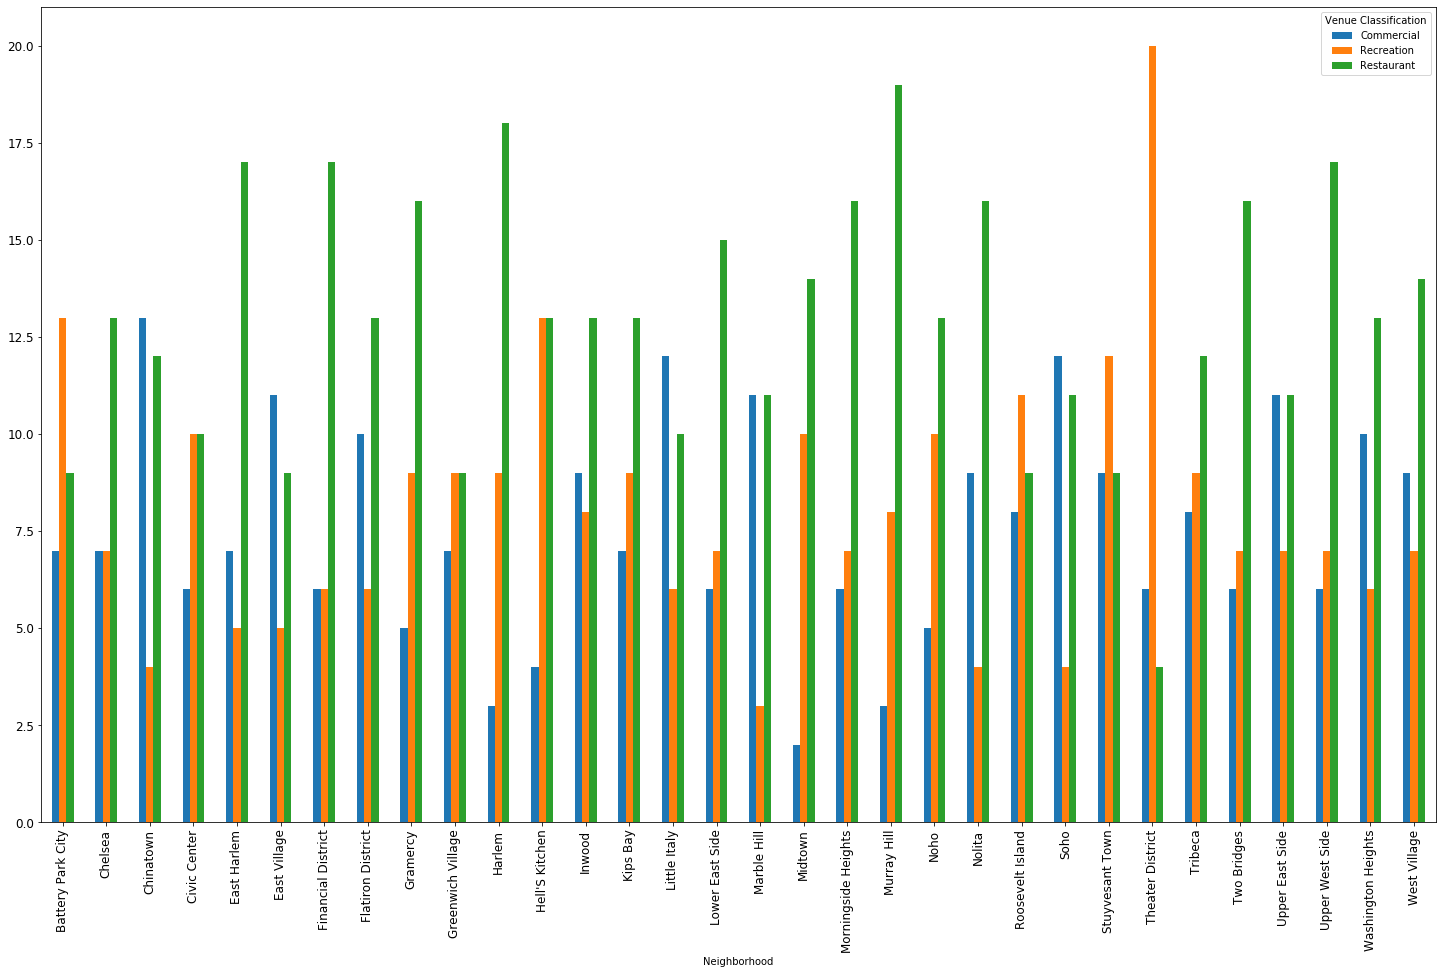

In [9]:
manhattan_venues_master.set_index('Neighborhood').plot(kind='bar',figsize=[25,15],fontsize=12)

The above graph indicates a moderately spread out distribution for restaurants in Manhattan. It also indicates similar trend for business locations. For recreational venues, Theater District has highest concentration, seems like pretty much an outstanding neighborhood in the aspect. So I consider Theater District as center and calculated euclidian distances for all other neighborhoods from it based on their co-ordinates. 
This new feature, distance from Theater District, will be added to the other datasets, and we shall use it to understand if it has any impact.

In [10]:
def add_column_from_geo(df,columnName):
    df.drop(columns=[columnName],errors="ignore",inplace=True)
    df = df.set_index('Neighborhood').join(manhattan_geo_data[['Neighborhood',columnName]].set_index('Neighborhood'))
    df.reset_index(inplace=True)
    df.rename(columns={"index":"Neighborhood"},inplace=True)
    return df

In [11]:
manhattan_center = manhattan_geo_data[manhattan_geo_data['Neighborhood'] == 'Theater District'][['Latitude','Longitude']]
manhattan_geo_data['distance'] = np.linalg.norm(manhattan_geo_data[['Latitude', 'Longitude']].sub(np.array(manhattan_center)), axis=1)

df_airbnb_master = add_column_from_geo(df_airbnb_master,'distance')
manhattan_venues_master = add_column_from_geo(manhattan_venues_master,'distance')

#### 2.4.2 Understanding Distribution of prices and density of AirBnB properties in Manhattan


There are basically 3 types of properties in AirBnB lisings, Entire Home/Apt, Private Room, and shared rooms. Out of these, Shared rooms number is very minimal compared to others. Here I am plotting their distributions across neighborhoods alongwith histograms of their avarage prices and count.

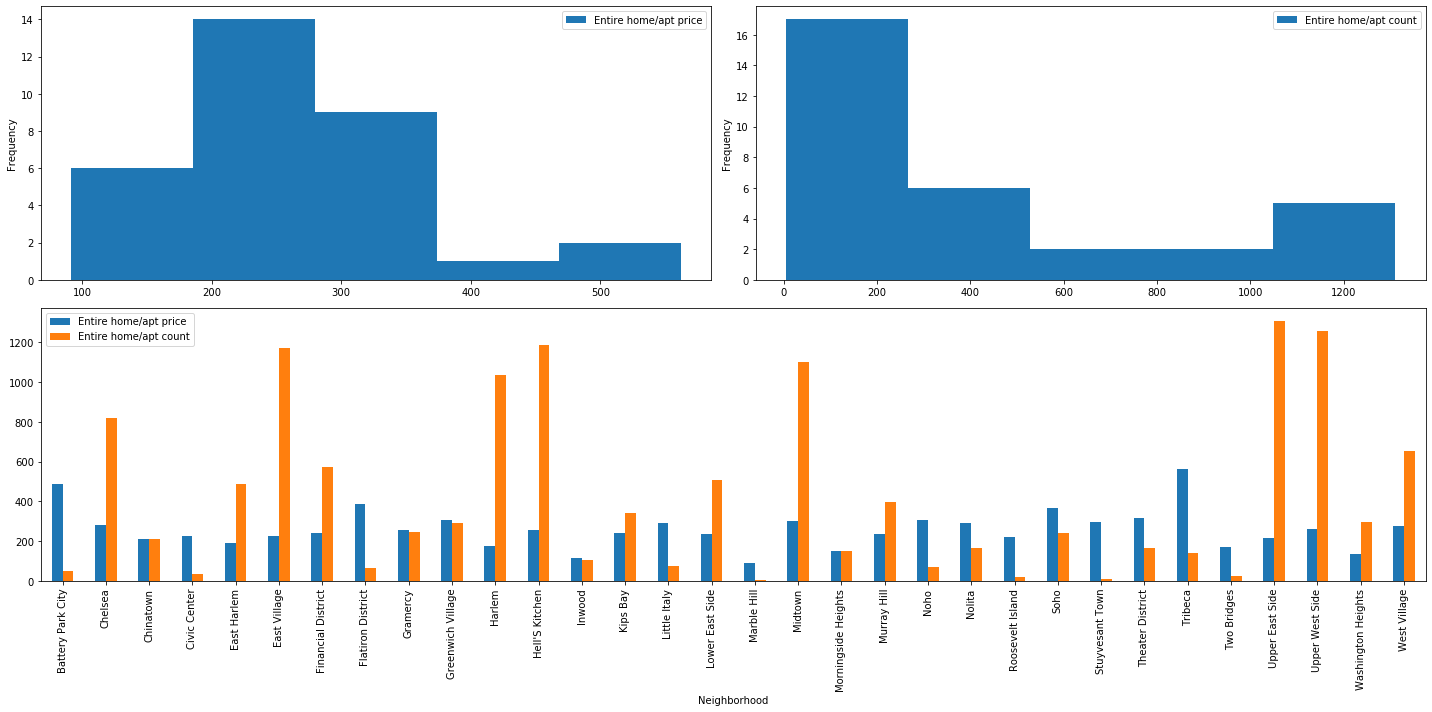

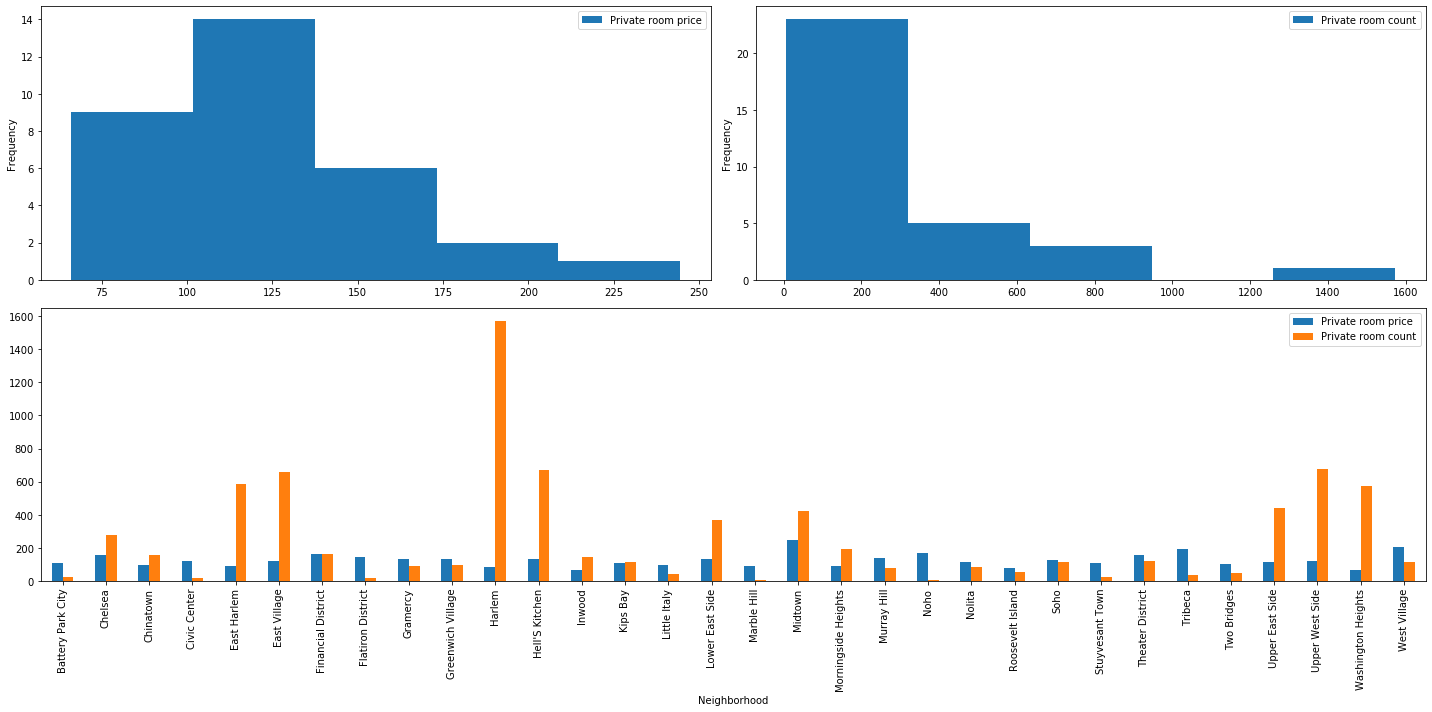

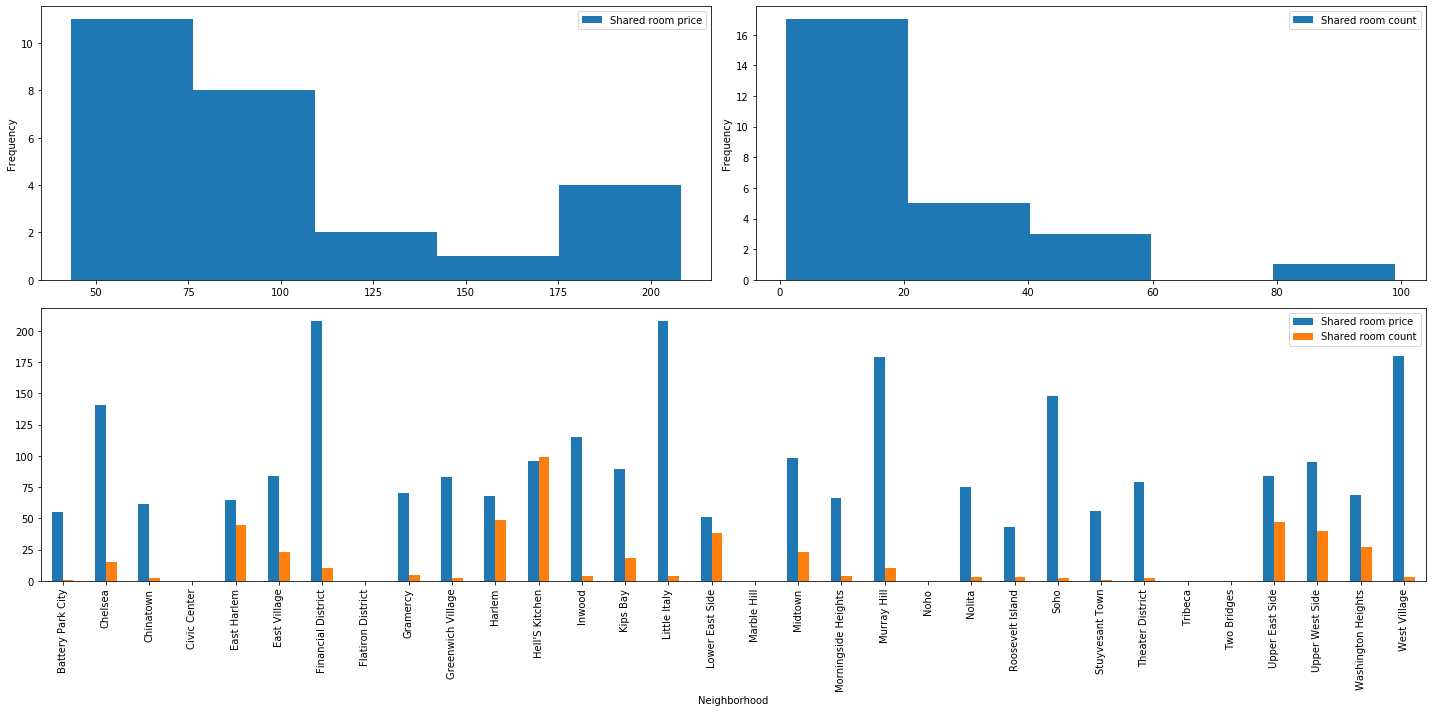

In [12]:
def plot_analysis(df):
    fig, axs = plt.subplots(ncols=2, nrows=2)
    gs = axs[1, 1].get_gridspec()
    # remove the underlying axes
    for ax in axs[-1, :]:
        ax.remove()
    axbig = fig.add_subplot(gs[-1, :])
    df.plot(ax=axbig,kind='bar',figsize=[20,10])
    df.iloc[:,[0]].plot(ax=axs[0,0],kind='hist',bins=5)
    df.iloc[:,[1]].plot(ax=axs[0,1],kind='hist',bins=5)
    fig.tight_layout()
    plt.show()

df_airbnb_master.head()
df_airbnb_an = df_airbnb_master[['Neighborhood','room_type','price']]

df_airbnb_t1 = df_airbnb_an.groupby(['Neighborhood','room_type']).mean().reset_index()
df_airbnb_t2 = df_airbnb_an.groupby(['Neighborhood','room_type']).size().reset_index()
df_airbnb_t2.columns = ['Neighborhood','room_type','count']
df_airbnb_t3 = df_airbnb_t1.set_index(['Neighborhood','room_type']).join(df_airbnb_t2.set_index(['Neighborhood','room_type']))
df_airbnb_t3.reset_index(inplace=True)
df_airbnb_plt = df_airbnb_t3.pivot(index='Neighborhood', columns='room_type',values=['price','count'])
df_airbnb_plt.reset_index(inplace=True)
df_airbnb_plt.columns = ['Neighborhood','Entire home/apt price','Private room price','Shared room price','Entire home/apt count','Private room count','Shared room count']
df_airbnb_plt.head()

df_airbnb_apt = df_airbnb_plt[['Neighborhood','Entire home/apt price','Entire home/apt count']].set_index(['Neighborhood'])
df_airbnb_pvt = df_airbnb_plt[['Neighborhood','Private room price','Private room count']].set_index(['Neighborhood'])
df_airbnb_shared = df_airbnb_plt[['Neighborhood','Shared room price','Shared room count']].set_index(['Neighborhood'])
plot_analysis(df_airbnb_apt)
plot_analysis(df_airbnb_pvt)
plot_analysis(df_airbnb_shared)


For entire rooms or apt, the prices range from aorund 75 to 375 for most of the properties and has very high count in many of the neighborhoods. Private rooms are more concentrated in Harlem and Hell's Kitchen area and avarage price veries between 35 to 175. Private rooms are very low in number comapred to other two times and again mostly concentrated in Harlem and Hell's Kitchen.

#### 2.4.3 Feature Selection 

Now I am plotting histogram for all the AirBnB dataset features to understand their impact on the concentration of AirBnB properties. For plotting and further analysis, we remove the textual and co-ordinates columns as we have that either integer encoded or converted to relavant field such as distance. 

In [13]:
df_airbnb_master = df_airbnb_master.drop(columns=['latitude','longitude','room_type'],errors='ignore')
df_airbnb_master.head()

,Neighborhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,room_type_encode,distance
0,Battery Park City,65,2,8,0.13,1,0,1318.0,1,0.056489
1,Battery Park City,400,1000,0,-1.00,1,362,-1.0,0,0.056489
2,Battery Park City,55,1,205,3.04,1,326,47.0,2,0.056489
3,Battery Park City,110,3,1,0.04,1,0,798.0,1,0.056489
4,Battery Park City,425,2,0,-1.00,1,0,-1.0,0,0.056489


minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365
days_since_last_review
room_type_encode
distance


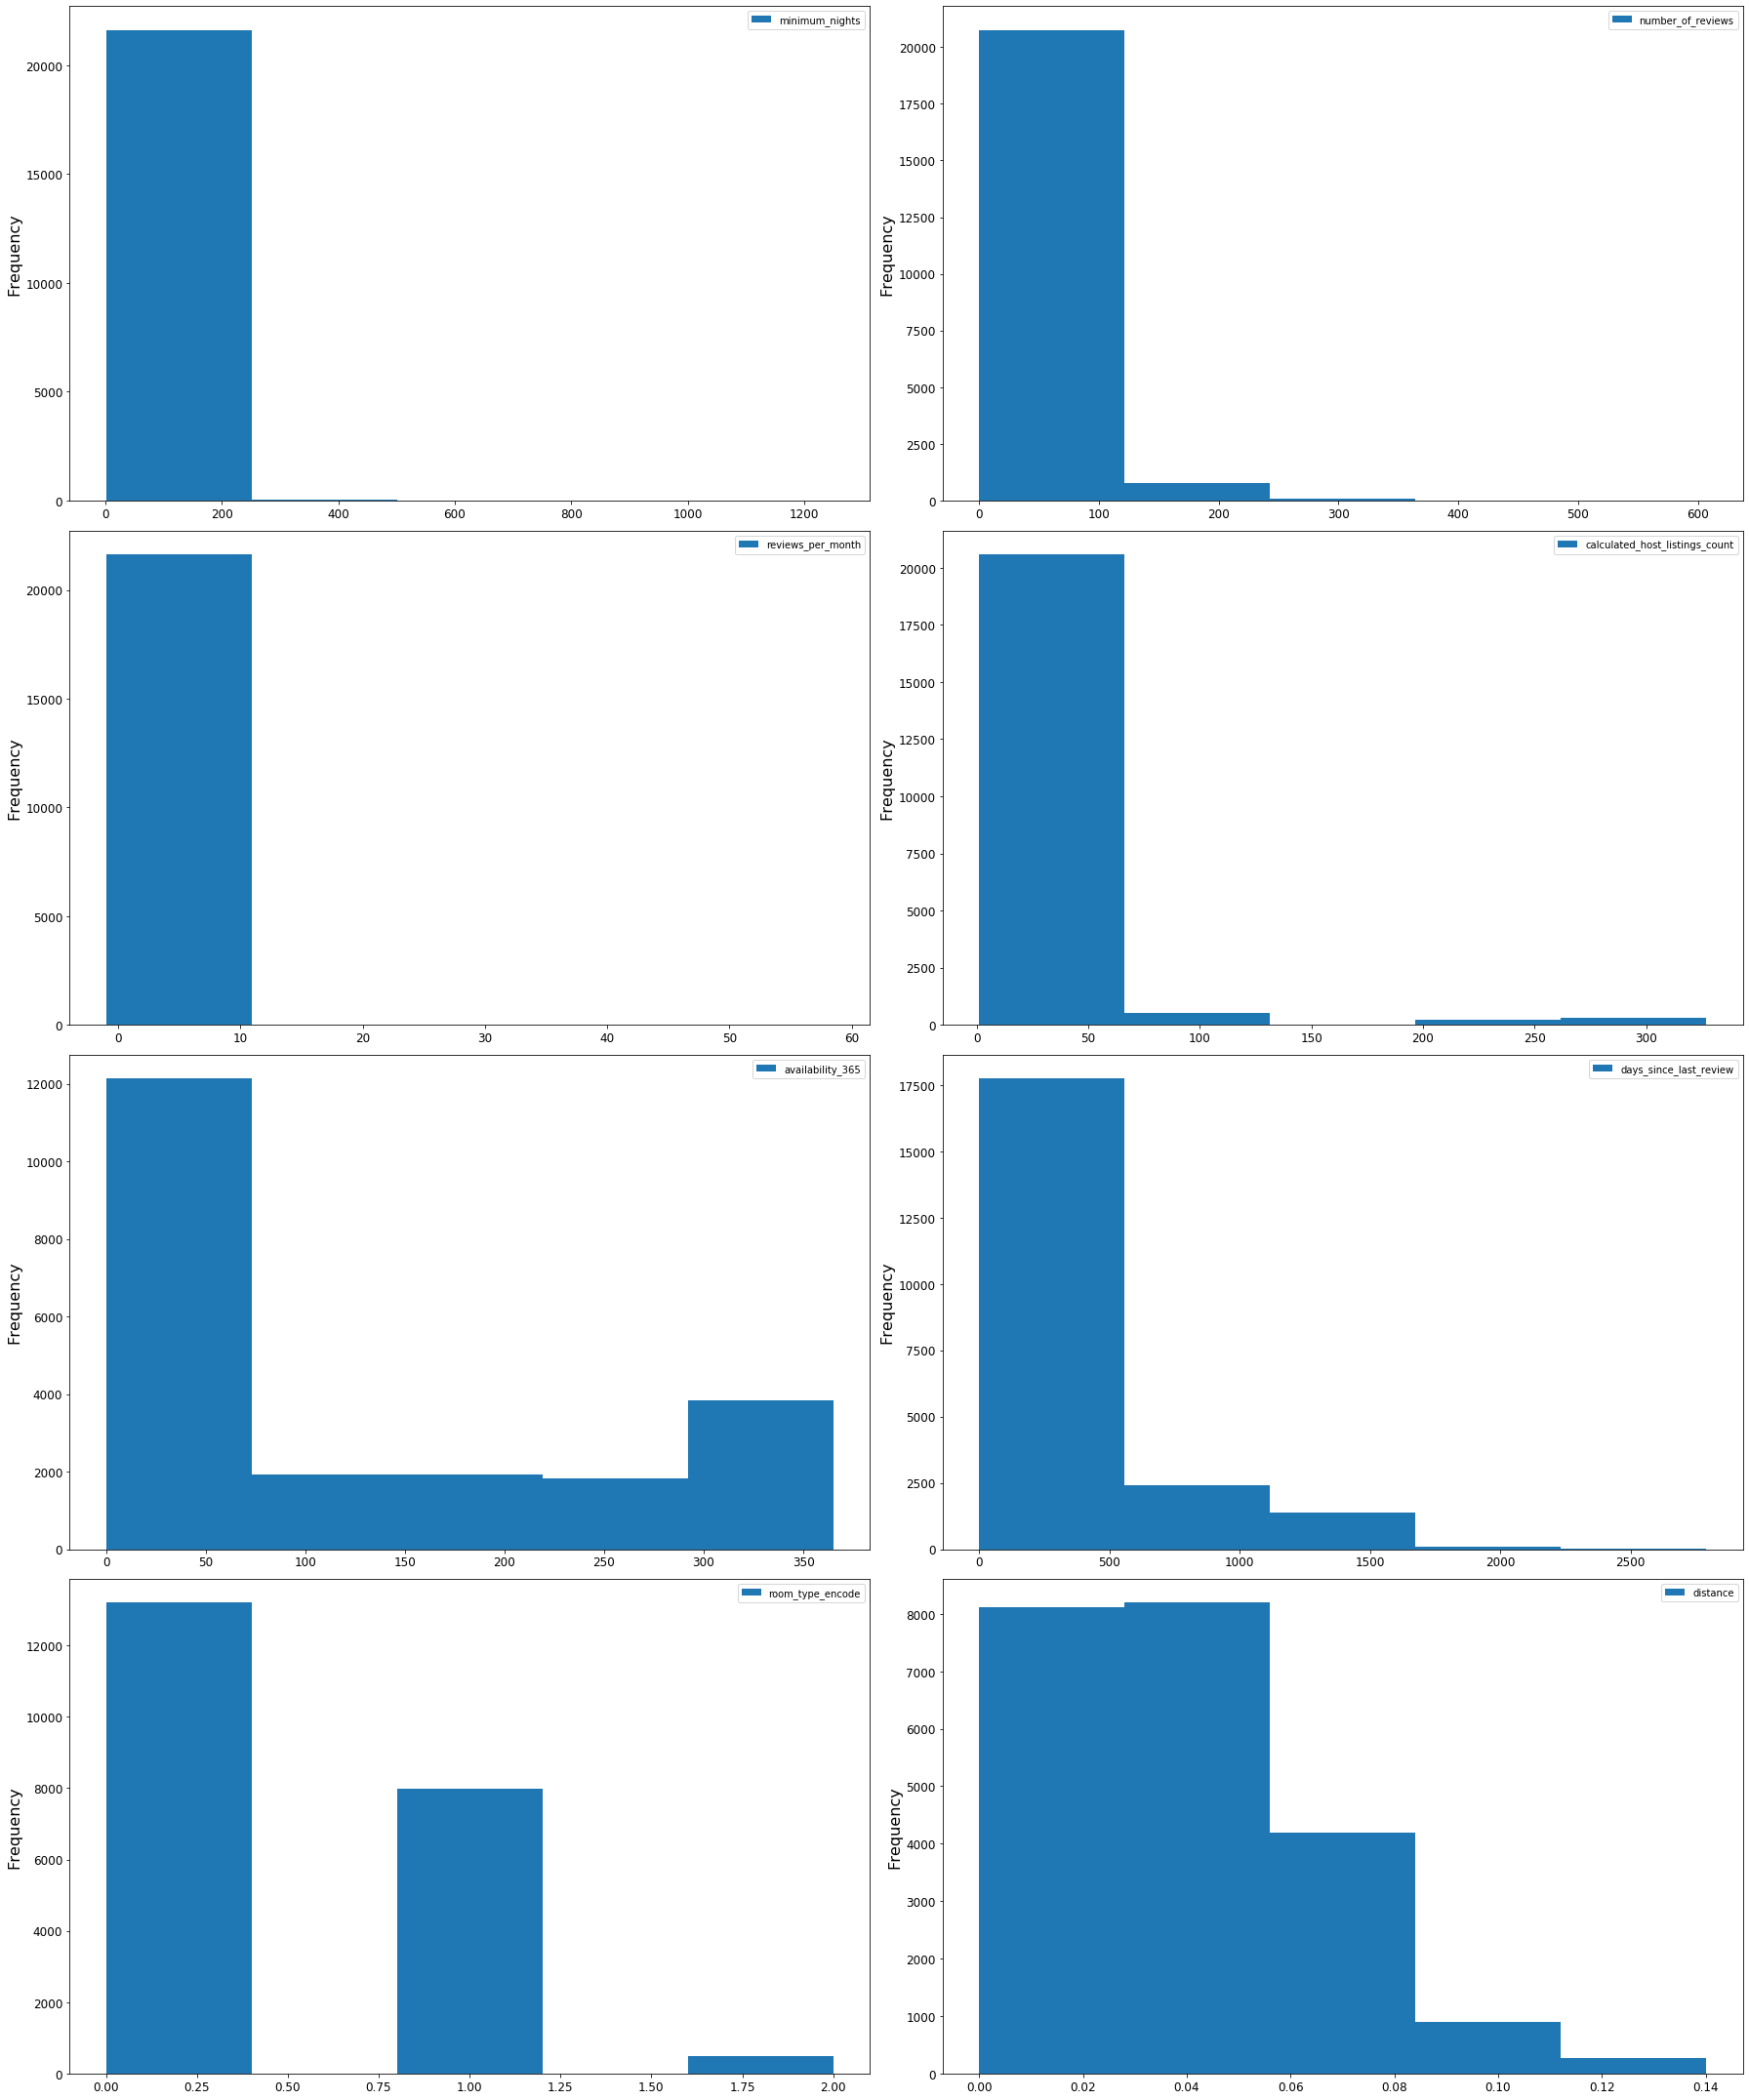

In [14]:
params = {'axes.labelsize': 16,
          'axes.titlesize': 16}
plt.rcParams.update(params)
fig, axs = plt.subplots(ncols=2, nrows=4)
i = 0
j = 0
fig.set_size_inches([25,30])
df_airbnb_ft =df_airbnb_master.drop(columns=['Neighborhood','price'])
for (columnName,columnData) in df_airbnb_ft.iteritems():
    print(columnName)
    df_airbnb_ft[[columnName]].plot(ax=axs[i,j],kind='hist',bins=5,fontsize=12)
    if j == 0:
      j = 1
    else:
      i = i+1
      j = 0
fig.tight_layout()        
plt.show()

The graphs indicates below points:
* The number of properties decreases with increase in distance (from Theater District), and increase in days_since_last_review, which is basically an indicator for how recently the place has been visited. I restrict data for analysis to __days since last visit less than around 2 years or 700 days__.
* The availability within an year has major concentration in 0-70 range, but has fair distribution across rest of the scale.
* For other features, there are too many outliers where most of the data is focused around first bin of the histogram.
* Number of reviews and reviews per month are pretty much overlapping features, indicating number of visits, so I chose to use only number of reviews for further analysis.

In [15]:
visited = (df_airbnb_master['days_since_last_review'] > 0) & (df_airbnb_master['days_since_last_review'] < 700)  #'calculated_host_listings_count','reviews_per_month',
df_airbnb_master.drop(columns=['reviews_per_month'],inplace=True)
df_airbnb_master = df_airbnb_master[visited]

## 3 Clustering and Segmentation

Now as our data for analysis is ready, I shall perform K-Means clustering on both the datasets, first on Four Square venues and then AirBnB dataset. I am evaluating K-Means algorithm based on elbow analysis to determine correct cluster numbers.

In [16]:
def evaluate_K_means(x_scaled,k_range):
    k_distortion = []
    for kclusters in k_range:
        kmeanModel = KMeans(init='k-means++',n_clusters=kclusters, random_state=0).fit(x_scaled)
        k_distortion.append(sum(np.min(cdist(x_scaled, kmeanModel.cluster_centers_, 
                     'euclidean'),axis=1)) / x_scaled.shape[0])
    plt.figure(figsize=(10, 7))
    plt.plot(k_range, k_distortion, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method using Distortion') 
    plt.show()   
  

### 3.2 Clustering of FourSquare Data

For clustering of four square data, we have number of venues in a category as values. As all the columns are on same scale, I am just normalizing the values than Standardizing them. 

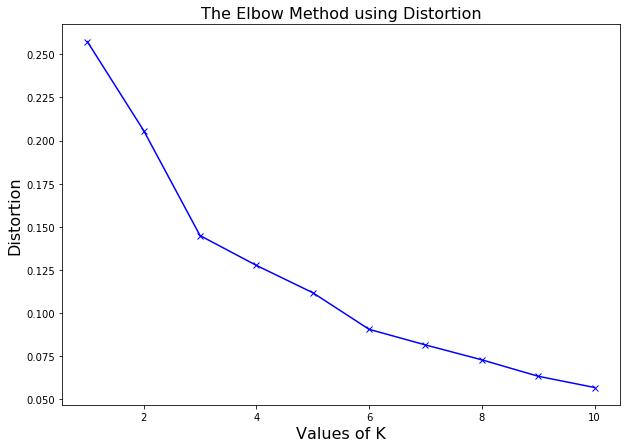

In [17]:
manhattan_venues_md = manhattan_venues_master.drop(columns=['Neighborhood','Neighborhood_code','Venue_Cluster','Venue_Cluster_optics'],errors='ignore')
x_scaled_fs = preprocessing.normalize(manhattan_venues_md)
evaluate_K_means(x_scaled_fs,range(1,11))

Though not a clear elbow, the slop of line decreases at K=3, So using 3 as number of clusters for Four Square data.

In [18]:
kmeanModel = KMeans(init='k-means++',n_clusters=3, random_state=0).fit(x_scaled_fs)
manhattan_venues_master['Venue_Cluster'] = kmeanModel.labels_
manhattan_venues_master.head()

,Neighborhood,Commercial,Recreation,Restaurant,distance,Venue_Cluster
0,Battery Park City,7,13,9,0.056489,2
1,Chelsea,7,7,13,0.019684,0
2,Chinatown,13,4,12,0.042848,1
3,Civic Center,6,10,10,0.047400,2
4,East Harlem,7,5,17,0.056594,0


In [19]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=5).fit(x_scaled_fs)
manhattan_venues_master['Venue_Cluster_optics'] = clustering.labels_
manhattan_venues_master.groupby(['Venue_Cluster_optics']).count()

,Neighborhood,Commercial,Recreation,Restaurant,distance,Venue_Cluster
Venue_Cluster_optics,,,,,,
-1,23,23,23,23,23,23
0,9,9,9,9,9,9


With Density based clustering, too many of the neighborhoods get categorized as Outliers. With K-Means, I can get some interpretable output, So I would go with K-Means clustering.

### 3.3 Clustering of AirBnB Properties

For clustering of AirBnB data, I am using standard scalar than just normalization as now we have data on different scales, including fractions and different ranges.

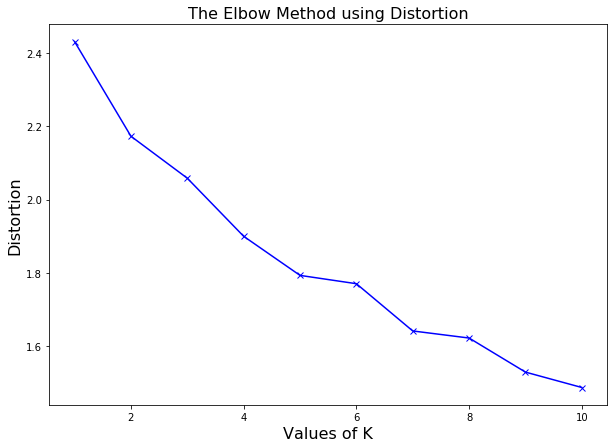

In [20]:
df_airbnb_master.drop(columns=['AirBnB_Cluster','AirBnB_Cluster_optics','Venue_Cluster'],errors='ignore',inplace=True)
x_scaled_ab = preprocessing.StandardScaler().fit_transform(df_airbnb_master.drop(columns=['Neighborhood']))
evaluate_K_means(x_scaled_ab,range(1,11))

Again there is no clear elbow, still at K=5, there is a noticeable change in the slope of the graph, so I am using this value for clustering.

In [21]:
kmeanModel = KMeans(init='k-means++',n_clusters=5, random_state=0).fit(x_scaled_ab)
#df_airbnb_master['AirBnB_Cluster'] = kmeanModel.labels_
df_airbnb_master['AirBnB_Cluster'] = kmeanModel.labels_
df_airbnb_master.head()

,Neighborhood,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,days_since_last_review,room_type_encode,distance,AirBnB_Cluster
2,Battery Park City,55,1,205,1,326,47.0,2,0.056489,3
7,Battery Park City,200,1,46,1,0,648.0,0,0.056489,4
20,Battery Park City,165,30,6,1,43,97.0,0,0.056489,2
28,Battery Park City,245,3,59,1,184,46.0,0,0.056489,2
31,Battery Park City,149,30,2,12,281,601.0,0,0.056489,4


In [22]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=50).fit(x_scaled_ab)
df_airbnb_master['AirBnB_Cluster_optics'] = clustering.labels_
df_airbnb_master.head()

,Neighborhood,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,days_since_last_review,room_type_encode,distance,AirBnB_Cluster,AirBnB_Cluster_optics
2,Battery Park City,55,1,205,1,326,47.0,2,0.056489,3,-1
7,Battery Park City,200,1,46,1,0,648.0,0,0.056489,4,-1
20,Battery Park City,165,30,6,1,43,97.0,0,0.056489,2,-1
28,Battery Park City,245,3,59,1,184,46.0,0,0.056489,2,-1
31,Battery Park City,149,30,2,12,281,601.0,0,0.056489,4,-1


In [23]:
df_airbnb_master[['AirBnB_Cluster_optics','price']].groupby(['AirBnB_Cluster_optics']).count()

,price
AirBnB_Cluster_optics,
-1,13166
0,72
1,104
2,213


Again there are too many outliers where results are not interpretable. So I would go with K-Mean clustering.

## 4 Result

### 4.1 Analysis and Discussion

#### 4.1.1 Four Square Venues Data

I am grouping Venues data cluster to understand if I can characterize them with any noticeable features. I am also listing the neighborhoods and their venues count for each cluster

In [24]:
manhattan_venues_master = manhattan_venues_master.drop(columns=['Venue_Cluster_optics'],errors='ignore')
manhattan_venues_master.groupby(['Neighborhood','Venue_Cluster']).size().reset_index().rename(columns={0:'count'})
df_tst = manhattan_venues_master.drop(columns=['Neighborhood','distance',]).groupby(['Venue_Cluster']).sum()
df_tst['count'] =  manhattan_venues_master.drop(columns=['Neighborhood','distance']).groupby(['Venue_Cluster'])['Restaurant'].count()
df_tst

,Commercial,Recreation,Restaurant,count
Venue_Cluster,,,,
0,69,101,204,13
1,117,60,133,11
2,55,97,75,8


__Cluster 0: Fun and Eat Places__    
The cluster has high concentration of recreational places and restaurants. This makes it most preferred for tourists who are on vacation or fun visits.

__Cluster 1: Commercial/Business Places__   
This cluster is highlighted with commercial or business places, so more suitable for people visiting for business or academic purposes.

__Cluster 2: Recreation/Attraction Centers__   
This cluster holds most of the entertainment or attraction places, but has lower concentration of other categories.

In [25]:
for k in range(0,3):
    df = manhattan_venues_master[manhattan_venues_master['Venue_Cluster'] == k]
    print('For Cluster ',k)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.expand_frame_repr', False):  # more options can be specified also
        print(df)


For Cluster  0
           Neighborhood  Commercial  Recreation  Restaurant  distance  Venue_Cluster
1               Chelsea           7           7          13  0.019684              0
4           East Harlem           7           5          17  0.056594              0
6    Financial District           6           6          17  0.055722              0
8              Gramercy           5           9          16  0.022509              0
10               Harlem           3           9          18  0.064034              0
13             Kips Bay           7           9          13  0.020283              0
15      Lower East Side           6           7          15  0.042063              0
17              Midtown           2          10          14  0.007376              0
18  Morningside Heights           6           7          16  0.056896              0
19          Murray Hill           3           8          19  0.011944              0
20                 Noho           5          10   

#### 4.1.2 AirBnB Data

I am grouping data by AirBnB Cluster and room types and showing stats, which can be used to Characterize the clusters.

In [26]:
df_airbnb_master = df_airbnb_master.drop(columns=['AirBnB_Cluster_optics','Venue_Cluster'],errors='ignore')
df_airbnb_conclude = df_airbnb_master.groupby(['AirBnB_Cluster','room_type_encode']).mean()
df_airbnb_conclude['count'] = df_airbnb_master.groupby(['AirBnB_Cluster','room_type_encode']).count()['price']
#df_airbnb_conclude['Neighborhoods'] = df_airbnb_master[['AirBnB_Cluster','room_type_encode','Neighborhood']].groupby(['AirBnB_Cluster','room_type_encode'])['Neighborhood'].nunique()
#pd.set_option('display.max_colwidth', -1)
df_airbnb_conclude

#calculated_host_listings_count - continious value which is actual number of host listings - another metric to measure host experience or to distinguish buisness from individual

price  minimum_nights  \
AirBnB_Cluster room_type_encode                               
0              0                 270.819383        7.951542   
               1                 304.375000        2.000000   
1              0                 110.473684        6.684211   
               1                 101.292402        4.198769   
               2                  72.913669        3.428058   
2              0                 247.297261        8.434885   
               1                 666.000000       28.137931   
3              0                 191.380702        3.507018   
               1                 102.205310        2.426549   
               2                  77.500000        1.600000   
4              0                 182.878399       11.407100   
               1                 102.832290        7.906133   
               2                  74.777778        6.277778   

                                 number_of_reviews  \
AirBnB_Cluster room_type_encode                      
0              0                          5.519824   
               1                          7.125000   
1              0                         25.263158   
               1                         25.257624   
               2                         27.902878   
2              0                         20.042010   
               1                          4.793103   
3              0                        156.975439   
               1                        175.663717   
               2                        186.800000   
4              0                          9.026435   
               1                         10.354193   
               2                          6.444444   

                                 calculated_host_listings_count  \
AirBnB_Cluster room_type_encode                                   
0              0                                     315.281938   
               1                                     327.000000   
1              0                                       1.184211   
               1                                       3.461477   
               2                                       4.345324   
2              0                                       5.797849   
               1                                       6.034483   
3              0                                       1.443860   
               1                                       2.244248   
               2                                       3.000000   
4              0                                       6.610272   
               1                                       1.549437   
               2                                       3.000000   

                                 availability_365  days_since_last_review  \
AirBnB_Cluster room_type_encode                                             
0              0                       285.198238               67.933921   
               1                       318.875000               56.750000   
1              0                        87.973684               76.447368   
               1                       130.898609               88.113697   
               2                       172.845324               92.848921   
2              0                       132.483448               88.624097   
               1                       249.655172              107.655172   
3              0                       188.749123               47.022807   
               1                       165.074336               49.343363   
               2                       242.400000               41.400000   
4              0                        49.414653              472.709215   
               1                        35.534418              499.793492   
               2                        27.222222              600.944444   

                                 distance  count  
AirBnB_Cluster room_type_encode                   
0              0 

__Group 0 - Commercial Property Organizations__    
First group is predominantly highlighted by commercial organizations such as hotels/bed and breakfast chains such as Holiday Inn, Ramada Inn and so on. This is based on very high listing counts (300+) and availability. 

__Group 1 - Low Cost Private Rooms__    
The second group has highest density of private rooms and shared rooms and very few entire rooms/apt rentals. Also it has lower costs.

__Group 2 - Apt or entire home for longer stay__    
The group is highlighted by highest concentration of entire home/apt renting with higher count for minimum nights. 

__Group 3 - Preferred short stay__    
The group has highest avarage number of reviews which indicates it has most visited places, also very low minimum nights indicates it is preferred for short duration stays like over a weekend.

__Group 4 - Low preference/Out of Business__    
This group has very high (450+) days since last review which indicates they are very rarely visited in recent times. That may be because they are not in business anymore or people just don't prefer them for staying.

#### 4.1.3 Consolidated Data Analysis

Now I am adding Venue cluster numbers to AirBnB data and then grouping them to get counts for each venue cluster and AirBnB cluster combination. This would get idea about the distribution of properties w.r.t. Venue cluster.

In [27]:
# add Venue Cluster to AirBnB Data
df_airbnb_master.drop(columns=['Venue_Cluster'],inplace=True,errors='ignore')
df_airbnb_master = df_airbnb_master.set_index(['Neighborhood']).join(manhattan_venues_master[['Neighborhood','Venue_Cluster']].set_index(['Neighborhood']))
df_airbnb_master.reset_index(inplace=True)

df_nei = df_airbnb_master[['AirBnB_Cluster','Neighborhood','room_type_encode','price']].groupby(['AirBnB_Cluster','room_type_encode','Neighborhood']).count()
df_nei.reset_index(inplace=True)
df_con = pd.pivot_table(df_nei, values='price', index=['Neighborhood'],columns=['AirBnB_Cluster'], aggfunc=np.sum, fill_value=0)
df_con['Total'] = df_con.sum(axis = 1, skipna = True)
df_con.sort_values(['Total'],ascending=False, inplace=True)
df_con = df_con.join(manhattan_venues_master[['Neighborhood','Venue_Cluster']].set_index(['Neighborhood']))
df_con2 = df_con.groupby(['Venue_Cluster']).sum()
print('###Venue_Cluster wise AirBnB Properties distribution#####')
df_con2


###Venue_Cluster wise AirBnB Properties distribution#####


,0,1,2,3,4,Total
Venue_Cluster,,,,,,
0,215,2259,3068,626,1149,7317
1,6,1226,2022,325,740,4319
2,14,569,890,194,252,1919


Venue cluster 0 has more than half of the properties and highest number of properties in each category. This is due to the fact that it holds most of the recreational places along with restaurants and has residential properties as well. So this cluster becomes natural choice for any Tourists.

Venue cluster 1 is the next preferred group, but has a slightly higher concentration of longer stay properties compared to other categories, which can be because of the clusters commercial feature.

Venue cluster 2 has lower number of properties, which can be attributed to non-residential nature of the cluster, has more of recreational places such as theaters, stadiums and so on.



In [28]:
print('###Neighborhood wise AirBnB Properties distribution#####')
df_con

###Neighborhood wise AirBnB Properties distribution#####


,0,1,2,3,4,Total,Venue_Cluster
Neighborhood,,,,,,,
Harlem,0,878,525,191,289,1883,0
Hell'S Kitchen,4,425,620,160,148,1357,2
East Village,1,263,560,116,205,1145,1
Upper East Side,4,260,615,70,191,1140,1
Upper West Side,2,276,516,78,221,1093,0
Midtown,1,164,490,48,116,819,0
East Harlem,0,352,265,104,98,819,0
Chelsea,7,117,358,68,108,658,0
Lower East Side,0,172,258,66,99,595,0


## 5 Conclusion and Next Steps

<a id="ref"></a>
## 6. References
https://www.wikipedia.org/    
https://www.kaggle.com/   
https://cocl.us/new_york_dataset   
https://stackoverflow.com/questions/46908388/find-euclidean-distance-from-a-point-to-rows-in-pandas-dataframe

